### 7 )
## in last project we do preprocessing 

In [9]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import export_text, plot_tree
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

In [2]:
# Load the dataset from CSV file
df = pd.read_csv(r'E:\tmu . machine\EX\تمرین 2\cargo+2000+freight+tracking+and+tracing (1)\c2k_data_comma.csv')

# Check for missing values and display the count for each column
df.isna().sum()

# Replace '?' with NaN and drop a specific row with missing values
df = df.replace('?', np.NaN)
df.drop(3942, inplace=True)


# Convert columns to numeric type
df = df.apply(pd.to_numeric)

# Fill missing values with the mean of each column
for col in df.columns:
    df[col] = df[col].replace(np.NaN, df[col].mean())

# Check for missing values after filling
df.isnull().sum()


# Convert the 'legs' column to the integer data type
df['legs'] = df['legs'].astype(int)

# Separate features (x) and target variable (y)
x = df.drop('legs', axis=1)
y = df['legs']

# Drop the 'nr' column from the features
df.drop('nr', axis=1, inplace=True)

# Standardize the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc = scaler.fit_transform(x)
x_scaled = pd.DataFrame(sc, columns=x.columns, index=x.index)

# Display the standardized features
x_scaled.head()


,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,...,o_rcf_2_place,o_dep_3_p,o_dep_3_e,o_dep_3_place,o_rcf_3_p,o_rcf_3_e,o_rcf_3_place,o_dlv_p,o_dlv_e,o_hops
0,-1.732003,-0.499935,-0.428069,-0.315229,0.029288,-0.725000,0.452405,0.315949,0.091148,-0.887648,...,3.950849e-16,0.0,6.129227e-15,8.609901e-15,3.783933e-15,-2.151786e-15,3.188235e-15,-1.610516,-0.226382,-0.926303
1,-1.731125,-0.184074,-0.290329,-0.234847,-0.826233,-0.605240,0.843388,2.589008,0.979835,-0.150321,...,3.950849e-16,0.0,6.129227e-15,8.609901e-15,3.783933e-15,-2.151786e-15,3.188235e-15,0.171105,-0.225619,-0.926303
2,-1.730246,-0.335998,0.464785,0.541517,-0.826233,-0.630068,-0.204961,0.247757,-0.156218,0.983056,...,3.950849e-16,0.0,6.129227e-15,8.609901e-15,3.783933e-15,-2.151786e-15,3.188235e-15,-1.743128,-0.151073,-0.926303
3,-1.729367,-1.420197,-0.308480,-0.325990,0.243168,0.095795,-1.420873,-1.036521,-0.116954,-0.495812,...,3.950849e-16,0.0,6.129227e-15,8.609901e-15,3.783933e-15,-2.151786e-15,3.188235e-15,0.119213,-0.245452,-0.926303
4,-1.728489,0.191379,-0.129525,-0.036968,-0.398473,-0.687027,-0.398303,-0.479622,-0.071145,-1.426950,...,-3.359928e-01,0.0,6.129227e-15,8.609901e-15,3.783933e-15,-2.151786e-15,3.188235e-15,0.326780,0.076171,1.025320


In [3]:
# Load and preprocess the data (assuming x_scaled and y are already defined)
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier with optional hyperparameters for better control
tree = DecisionTreeClassifier(
    criterion='gini',  # Specify the criterion for information gain
    splitter='best',   # Choose the best split strategy
    random_state=42
)

# Train the model on the training data
tree.fit(x_train, y_train)

# Report the shape of the resulting tree
tree_shape = tree.tree_.node_count
print("Tree Shape:", tree_shape)

# Make predictions on the testing data
y_pred = tree.predict(x_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Tree Shape: 11
Accuracy: 0.9987325728770595


In [4]:
# Extract rules from the tree
tree_rules = export_text(tree, feature_names=list(x_scaled.columns))  # Convert to list for proper handling

# Display rules
print("Rules from the Decision Tree:")
print(tree_rules)

# Apply the rules to the test set
rules_result = tree.apply(x_test)

# Extract rules for class 1 (legs=1)
class_1_rules = []

for rule_id in np.unique(rules_result):
    rule_mask = np.array(rules_result == rule_id)  # Convert to numpy array for proper truth evaluation
    if any(y_test[rule_mask] == 1):
        class_1_rules.append(rule_id)

# Display rules for class 1
print("\nRules for class 1:")
for rule_id in class_1_rules:
    print(f"Rule ID {rule_id}: {tree_rules.splitlines()[rule_id - 1]}")


Rules from the Decision Tree:
|--- i3_rcs_e <= -0.00
|   |--- class: 3
|--- i3_rcs_e >  -0.00
|   |--- i2_rcs_e <= -0.00
|   |   |--- i3_rcs_e <= 0.00
|   |   |   |--- class: 2
|   |   |--- i3_rcs_e >  0.00
|   |   |   |--- class: 3
|   |--- i2_rcs_e >  -0.00
|   |   |--- i2_rcs_e <= 0.00
|   |   |   |--- class: 1
|   |   |--- i2_rcs_e >  0.00
|   |   |   |--- i3_rcs_e <= 0.00
|   |   |   |   |--- class: 2
|   |   |   |--- i3_rcs_e >  0.00
|   |   |   |   |--- class: 3


Rules for class 1:
Rule ID 7: |   |   |--- i3_rcs_e >  0.00


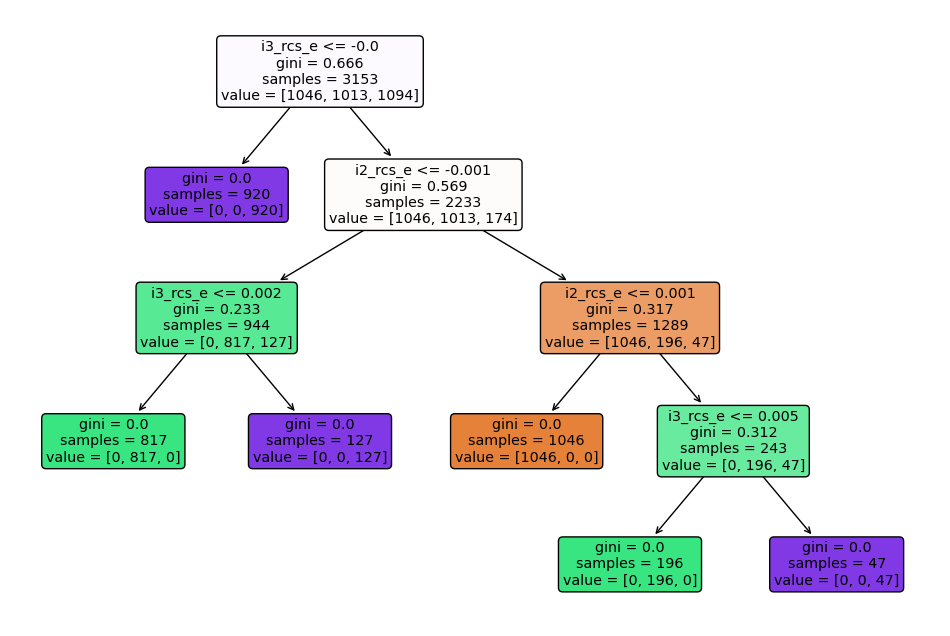

In [5]:
# Create a Decision Tree model with a random seed for reproducibility
tree_model = DecisionTreeClassifier(random_state=42)

# Train (fit) the Decision Tree model using the training data
tree_model.fit(x_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=x_scaled.columns, rounded=True)
plt.show()


In [12]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Create an instance of the DecisionTreeClassifier without pruning
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)

# Get the cost complexity pruning path
ccp_path = tree.cost_complexity_pruning_path(x_train, y_train)

# Extract the values of alpha (cost complexity parameter) and impurities
alphas, impurities = ccp_path.ccp_alphas, ccp_path.impurities

# Initialize variables to store results
tree_shapes = []
accuracies = []
rule_sets = []
reductions = []

# Function to evaluate and store results for a given alpha
def evaluate_pruned_tree(alpha, x_train, y_train, x_test, y_test):
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_tree.fit(x_train, y_train)

    # Get tree shape
    tree_shape = pruned_tree.tree_.node_count
    tree_shapes.append(tree_shape)

    # Evaluate the model on the testing data
    accuracy = pruned_tree.score(x_test, y_test)
    accuracies.append(accuracy)

    # Extract rules from the pruned tree
    pruned_tree_rules = export_text(pruned_tree, feature_names=list(x_scaled.columns))
    rule_sets.append(pruned_tree_rules)

    # Calculate reduction in tree size
    reduction = tree_shape - 1  # Subtract 1 for the root node
    reductions.append(reduction)

# Iterate over different values of alpha
for alpha in alphas:
    evaluate_pruned_tree(alpha, x_train, y_train, x_test, y_test)

# Find the value of alpha where the tree contains k leaves
k = 12  # Change k to the desired number of leaves
alpha_for_k_leaves = alphas[np.where(np.array(tree_shapes) <= k)[0][-1]]

# Create the pruned tree with k leaves
pruned_tree_k_leaves = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha_for_k_leaves)
pruned_tree_k_leaves.fit(x_train, y_train)

# Display the results
for i in range(len(alphas)):
    print(f"Alpha = {alphas[i]:.6f}, Tree Shape = {tree_shapes[i]}, Accuracy = {accuracies[i]:.4f}, Reduction = {reductions[i]}")

print("\nPruned Tree with", k, "Leaves:")
print(f"Alpha for {k} leaves = {alpha_for_k_leaves:.6f}")
print(f"Tree Shape = {pruned_tree_k_leaves.tree_.node_count}, Accuracy = {pruned_tree_k_leaves.score(x_test, y_test):.4f}")

# Display the rules for the pruned tree with k leaves
pruned_tree_k_leaves_rules = export_text(pruned_tree_k_leaves, feature_names=list(x_scaled.columns))


Alpha = 0.000000, Tree Shape = 11, Accuracy = 0.9987, Reduction = 10
Alpha = 0.024047, Tree Shape = 9, Accuracy = 0.9759, Reduction = 8
Alpha = 0.069720, Tree Shape = 7, Accuracy = 0.9227, Reduction = 6
Alpha = 0.105568, Tree Shape = 5, Accuracy = 0.8542, Reduction = 4
Alpha = 0.203431, Tree Shape = 3, Accuracy = 0.6122, Reduction = 2
Alpha = 0.263568, Tree Shape = 1, Accuracy = 0.3447, Reduction = 0

Pruned Tree with 12 Leaves:
Alpha for 12 leaves = 0.263568
Tree Shape = 1, Accuracy = 0.3447


## 8)

In [7]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# List of C values to experiment with
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Store results in a list of dictionaries
results = []

# Loop through different C values
for C_value in C_values:
    # Create an SVM model with radial basis function (RBF) kernel
    svm_model = SVC(C=C_value, kernel='rbf')
    
    # Train the model on the training data
    svm_model.fit(x_train, y_train)
    
    # Make predictions on the testing data
    y_pred = svm_model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Count the number of support vectors
    support_vectors_count = len(svm_model.support_vectors_)
    
    # Append results to the list
    results.append({
        'C': C_value,
        'Accuracy': accuracy,
        'Support Vectors': support_vectors_count
    })

# Display the results in a table
results_df = pd.DataFrame(results)
print(results_df)


          C  Accuracy  Support Vectors
0     0.001  0.344740             3106
1     0.010  0.546261             3046
2     0.100  0.768061             2718
3     1.000  0.967047             1930
4    10.000  0.975919             1633
5   100.000  0.975919             1625
6  1000.000  0.975919             1625


In [8]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# List of C values and kernel functions to experiment with
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
kernel_functions = ['rbf', 'poly']

# Store results in a list of dictionaries
results = []

# Loop through different kernel functions and C values
for kernel_function in kernel_functions:
    for C_value in C_values:
        # Create an SVM model
        svm_model = SVC(C=C_value, kernel=kernel_function)
        
        # Train the model on the training data
        svm_model.fit(x_train, y_train)
        
        # Make predictions on the testing data
        y_pred = svm_model.predict(x_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Count the number of support vectors
        support_vectors_count = len(svm_model.support_vectors_)
        
        # Append results to the list
        results.append({
            'Kernel': kernel_function,
            'C': C_value,
            'Accuracy': accuracy,
            'Support Vectors': support_vectors_count
        })

# Display the results in a table
results_df = pd.DataFrame(results)
print(results_df)


   Kernel         C  Accuracy  Support Vectors
0     rbf    0.0001  0.344740             3109
1     rbf    0.0010  0.344740             3106
2     rbf    0.0100  0.546261             3046
3     rbf    0.1000  0.768061             2718
4     rbf    1.0000  0.967047             1930
5     rbf   10.0000  0.975919             1633
6     rbf  100.0000  0.975919             1625
7    poly    0.0001  0.344740             3136
8    poly    0.0010  0.344740             3133
9    poly    0.0100  0.344740             3134
10   poly    0.1000  0.386565             3096
11   poly    1.0000  0.512041             3007
12   poly   10.0000  0.718631             2715
13   poly  100.0000  0.799747             2410


Results for Decision Tree:
Accuracy: 0.9987325728770595
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       272
           2       1.00      1.00      1.00       245
           3       1.00      1.00      1.00       272

    accuracy                           1.00       789
   macro avg       1.00      1.00      1.00       789
weighted avg       1.00      1.00      1.00       789



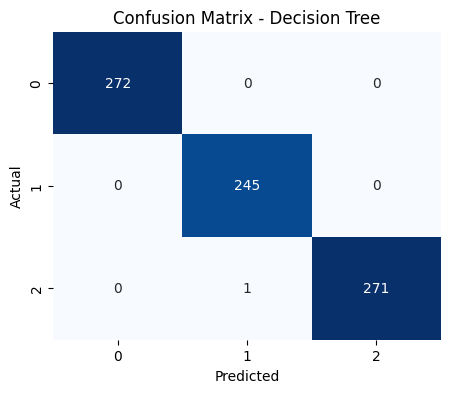



Results for Naive Bayes:
Accuracy: 0.9974651457541192
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       272
           2       1.00      1.00      1.00       245
           3       0.99      1.00      1.00       272

    accuracy                           1.00       789
   macro avg       1.00      1.00      1.00       789
weighted avg       1.00      1.00      1.00       789



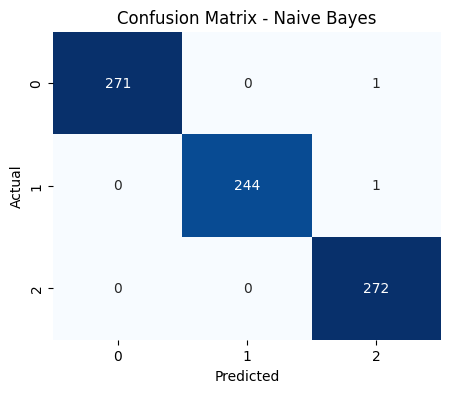



Results for SVM:
Accuracy: 0.9670468948035488
Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       272
           2       0.98      0.94      0.96       245
           3       0.95      0.99      0.97       272

    accuracy                           0.97       789
   macro avg       0.97      0.97      0.97       789
weighted avg       0.97      0.97      0.97       789



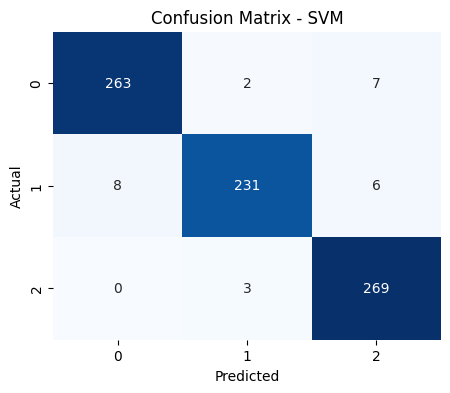

In [11]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)

# Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)

# SVM
svm = SVC()
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)

# Evaluate and compare the models
models = {'Decision Tree': tree_pred, 'Naive Bayes': nb_pred, 'SVM': svm_pred}
for model_name, predictions in models.items():
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, predictions)}")
    print(f"Classification Report:\n{classification_report(y_test, predictions)}")
    
    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\n")